In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

from pydataset import data

# module for visualizations
#import viz_kmeans

import wrangle as wrg
import os 
import viz_kmeans as viz

np.random.seed(123)

In [2]:
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.shape

(150, 5)

In [4]:
new_col_name = []

for col in iris.columns:
    new_col_name.append(col.lower().replace('.', '_'))

iris.columns = new_col_name

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [5]:
#defines X as the features we want to use for clustering; independent variables for k-means
X = iris[['sepal_width', 'petal_width']]

X.head()

,sepal_width,petal_width
1,3.5,0.2
2,3.0,0.2
3,3.2,0.2
4,3.1,0.2
5,3.6,0.2


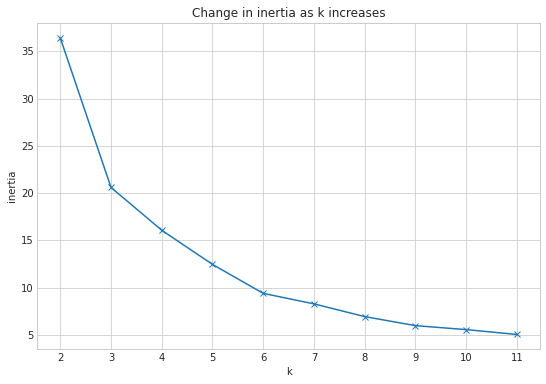

In [6]:
#Elbow Method
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [7]:
# 3 is the best k value

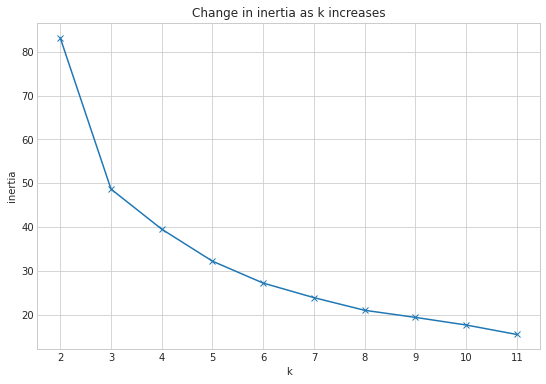

In [8]:
# eblow with 3 features

X = iris[['sepal_width', 'petal_width', 'sepal_length']]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [9]:
# 3 is still the best k value

In [10]:
#Modleing with the best k value
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [11]:
sql_query = "select * from customers"
directory = os.getcwd()
url_for_query = wrg.get_db_url("mall_customers")
filename = "customers.csv"

In [12]:
customers = wrg.get_sql_data(sql_query, url_for_query, filename)

csv found and loaded


In [13]:
customers.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score
0,0,1,Male,19,15,39
1,1,2,Male,21,15,81
2,2,3,Female,20,16,6
3,3,4,Female,23,16,77
4,4,5,Female,31,17,40


In [14]:
customers.shape

(200, 6)

In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      200 non-null    int64 
 1   customer_id     200 non-null    int64 
 2   gender          200 non-null    object
 3   age             200 non-null    int64 
 4   annual_income   200 non-null    int64 
 5   spending_score  200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [16]:
#a function that checks data frame for object columns and returns a dataframe with those columns dummy encoded
def get_dummy_df(df, dummy_list):    
    for dummy in dummy_list:
        dummies = pd.get_dummies(df[dummy], dummy, drop_first=False)
        dummy_df = pd.concat([df, dummies], axis=1)
    return dummy_df

In [17]:
dummy_list = ["gender"]
dummy_df=get_dummy_df(customers, dummy_list)


In [18]:
dummy_df.head()

,Unnamed: 0,customer_id,gender,age,annual_income,spending_score,gender_Female,gender_Male
0,0,1,Male,19,15,39,0,1
1,1,2,Male,21,15,81,0,1
2,2,3,Female,20,16,6,1,0
3,3,4,Female,23,16,77,1,0
4,4,5,Female,31,17,40,1,0


In [19]:
#contact customers and dummy_df dataframes only addin the dummy columns to the customers dataframe
customers = pd.concat([customers, dummy_df], axis=1)
#drop all duplicate columns
customers = customers.loc[:,~customers.columns.duplicated()]
customers = customers.drop("Unnamed: 0", axis=1)
customers.head()  

,customer_id,gender,age,annual_income,spending_score,gender_Female,gender_Male
0,1,Male,19,15,39,0,1
1,2,Male,21,15,81,0,1
2,3,Female,20,16,6,1,0
3,4,Female,23,16,77,1,0
4,5,Female,31,17,40,1,0


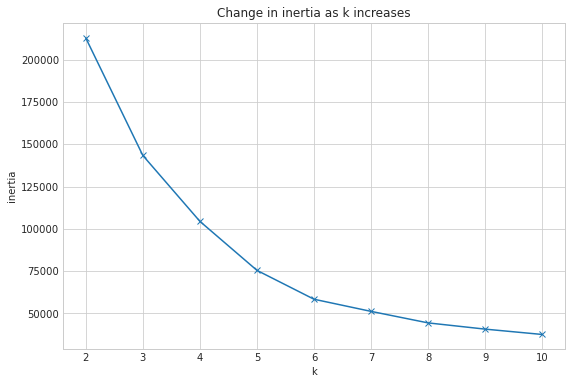

In [20]:
#elbow method for all features
X = customers[["age","annual_income","spending_score", "gender_Female", "gender_Male"]]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 11)}).plot(marker='x')
    plt.xticks(range(2, 11))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

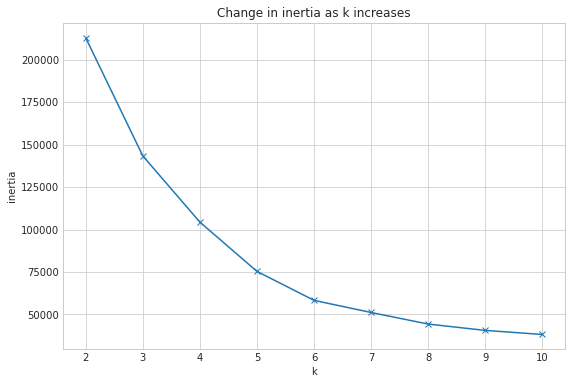

In [21]:
#elbow method for all features but gender
X = customers[["age","annual_income","spending_score"]]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 11)}).plot(marker='x')
    plt.xticks(range(2, 11))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [22]:
# MAKE the thing
kmeans = KMeans(n_clusters=3)

# FIT the thing
kmeans.fit(X)

# USE (predict using) the thing 
kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

In [23]:
customers["cluster"] = kmeans.predict(X)
X["cluster"] = kmeans.predict(X)

customers.head()

,customer_id,gender,age,annual_income,spending_score,gender_Female,gender_Male,cluster
0,1,Male,19,15,39,0,1,1
1,2,Male,21,15,81,0,1,1
2,3,Female,20,16,6,1,0,1
3,4,Female,23,16,77,1,0,1
4,5,Female,31,17,40,1,0,1


In [24]:
customers.sample(10)

,customer_id,gender,age,annual_income,spending_score,gender_Female,gender_Male,cluster
54,55,Female,50,43,45,1,0,1
147,148,Female,32,77,74,1,0,0
88,89,Female,34,58,60,1,0,1
96,97,Female,47,60,47,1,0,1
38,39,Female,36,37,26,1,0,1
65,66,Male,18,48,59,0,1,1
72,73,Female,60,50,49,1,0,1
40,41,Female,65,38,35,1,0,1
90,91,Female,68,59,55,1,0,1
83,84,Female,46,54,44,1,0,1


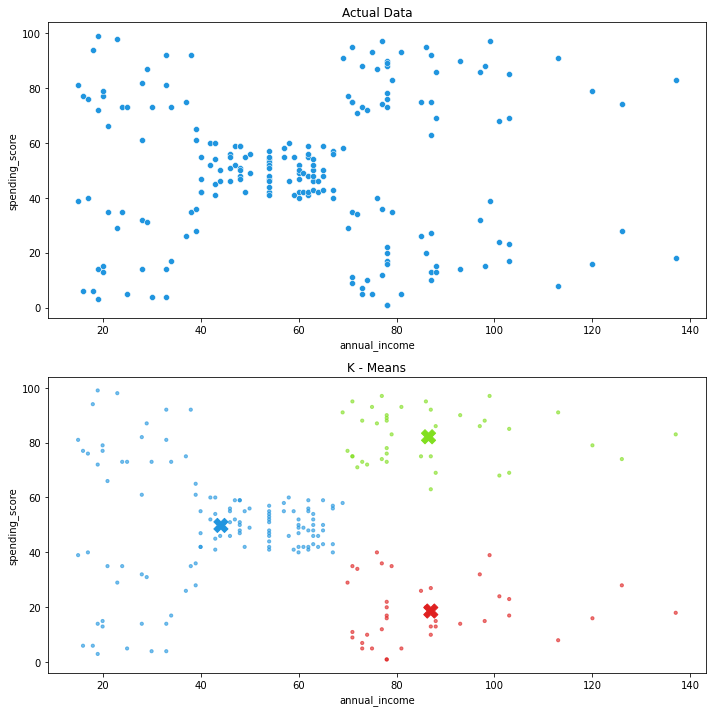

In [25]:
#visualize clusters
viz.viz_actual_predicted(customers)

In [26]:
customers.groupby("cluster").mean()

,customer_id,age,annual_income,spending_score,gender_Female,gender_Male
cluster,,,,,,
0,162.0,32.692308,86.538462,82.128205,0.538462,0.461538
1,62.0,40.325203,44.154472,49.829268,0.593496,0.406504
2,162.0,40.394737,87.000000,18.631579,0.473684,0.526316


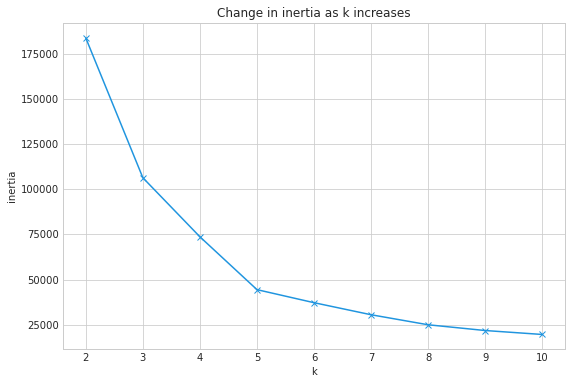

In [27]:
#elbow method for all features but gender
X = customers[["annual_income","spending_score"]]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 11)}).plot(marker='x')
    plt.xticks(range(2, 11))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

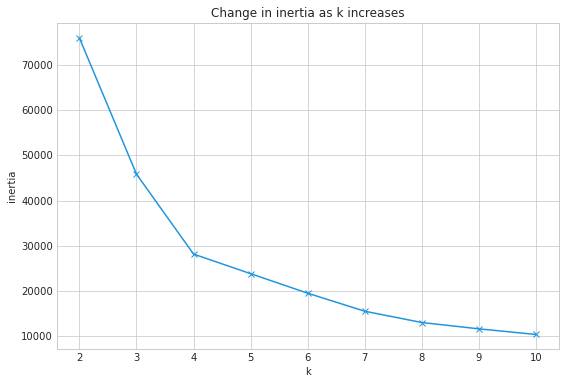

In [28]:
#elbow method for all features but gender
X = customers[["age","spending_score"]]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 11)}).plot(marker='x')
    plt.xticks(range(2, 11))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

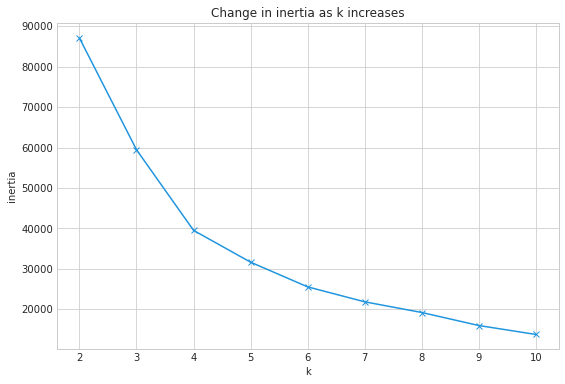

In [29]:
#elbow method for all features but gender
X = customers[["age","annual_income"]]

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 11)}).plot(marker='x')
    plt.xticks(range(2, 11))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [30]:
#modeling without scaling